<a href="https://colab.research.google.com/github/YagmurTaze/FaceMaskDetection/blob/main/FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten ,Dense ,Dropout ,BatchNormalization
from tensorflow.keras.optimizers import Adamax

from tensorflow.keras.utils import plot_model

from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Dataset

In [20]:
data_with_mask_dir = '/content/drive/MyDrive/Datasets/Face Mask Dataset/with_mask'
data_without_mask_dir = '/content/drive/MyDrive/Datasets/Face Mask Dataset/without_mask'

In [21]:
data_with_mask= os.listdir(data_with_mask_dir)[:1]
data_without_mask= os.listdir(data_without_mask_dir)[:1]

Text(0.5, 1.0, 'Image with Mask')

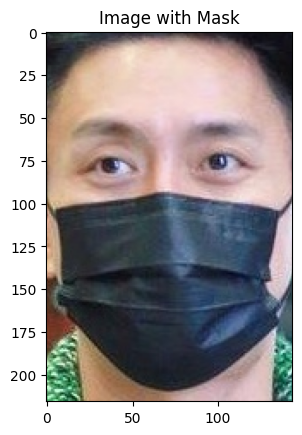

In [22]:
img_path = os.path.join(data_with_mask_dir, data_with_mask[0])
img = Image.open(img_path)
plt.imshow(img)
plt.title('Image with Mask')

Text(0.5, 1.0, 'Image without Mask')

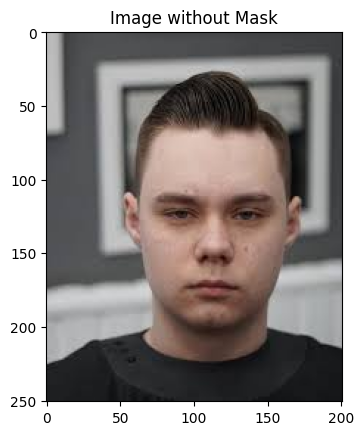

In [25]:
img_path = os.path.join(data_without_mask_dir, data_without_mask[0])
img = Image.open(img_path)
plt.imshow(img)
plt.title('Image without Mask')